<a href="https://colab.research.google.com/github/abhaysinghhh/Cara_Prices_Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Import Python Libraries
Setting up the Environment

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=eacf162cdd54ee17d3a8ad41656ce75378830469a76cff938c5e08f00bdbd878
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 30)
#np.random.seed(4)

# Exploratory Data Analysis

## Understanding the Data

In [23]:
df = pd.read_csv("Kaggle_Dataset.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
df.columns #given features that affect price

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [25]:
df.shape

(205, 26)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing

In [27]:
cars = df.copy()

In [28]:
brand = cars['CarName'].apply(lambda x : x.split(' ')[0]) #split company name from carname
cars.insert(3,"CompanyName", brand)

In [29]:
cars.drop(["CarName"], axis = 1, inplace = True)

In [30]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

###### Spelling errors in 'CompanyName' column

In [31]:
cars.CompanyName = cars.CompanyName.str.lower()

#replace with correct spellings
cars.CompanyName.replace('maxda','mazda', inplace = True)
cars.CompanyName.replace('porcshce','porsche', inplace = True)
cars.CompanyName.replace('toyouta','toyota', inplace = True)
cars.CompanyName.replace('vokswagen','volkswagen', inplace = True)
cars.CompanyName.replace('vw','volkswagen', inplace = True)

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [33]:
#No Duplicated values found
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Checking for Null Values

In [34]:
cars.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [35]:
cars[['doornumber','cylindernumber']].head()

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


In [36]:
from word2number import w2n
#convert number words to numeric digits

for i in range(len(cars.doornumber)):
    cars.doornumber[i] = w2n.word_to_num(cars.doornumber[i])
    cars.cylindernumber[i] = w2n.word_to_num(cars.cylindernumber[i])
cars[['doornumber','cylindernumber']].head()

<ipython-input-36-c305a9c597ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.doornumber[i] = w2n.word_to_num(cars.doornumber[i])
<ipython-input-36-c305a9c597ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.cylindernumber[i] = w2n.word_to_num(cars.cylindernumber[i])


,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


## Understanding and Visualising Data

In [37]:
import warnings
warnings.filterwarnings('ignore')

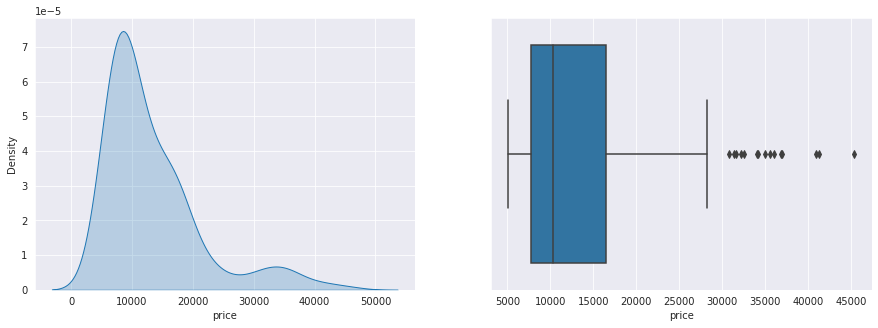

In [38]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.kdeplot(cars.price, fill = 'true')
plt.subplot(1,2,2)
sns.boxplot(cars.price)
plt.show()

Inference :

1. The plot is right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [39]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [40]:
#Feature Generation
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

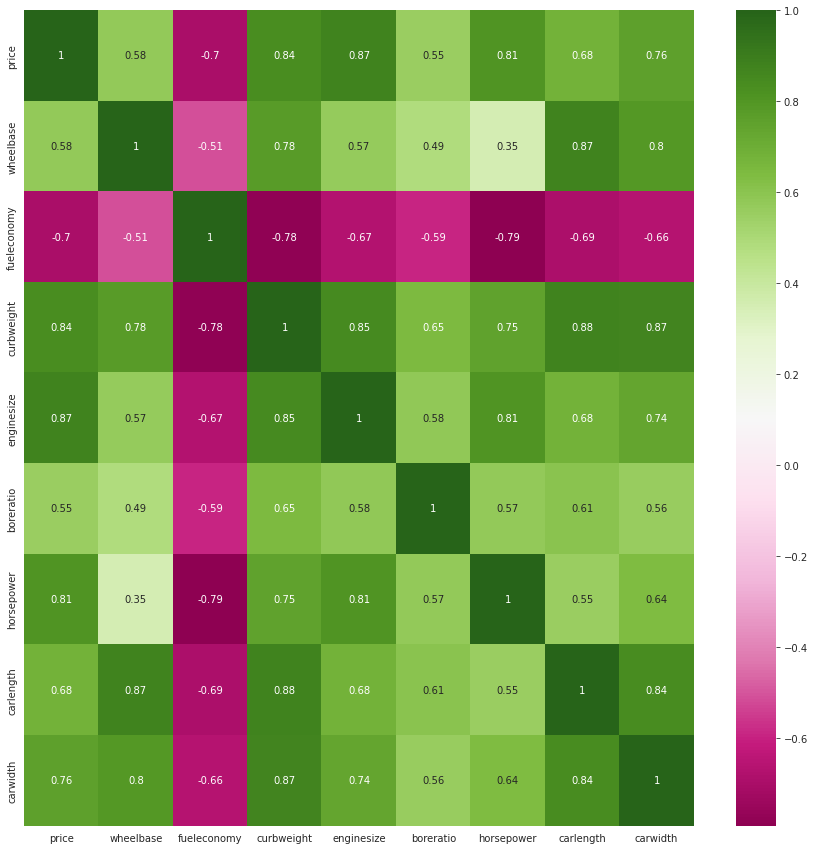

In [41]:
cars1 = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','fueleconomy',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]

plt.figure(figsize = (15,15))
sns.heatmap(cars1.corr(), annot = True, cmap = "PiYG")
plt.show()

### Visualising Categorical data

In [42]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

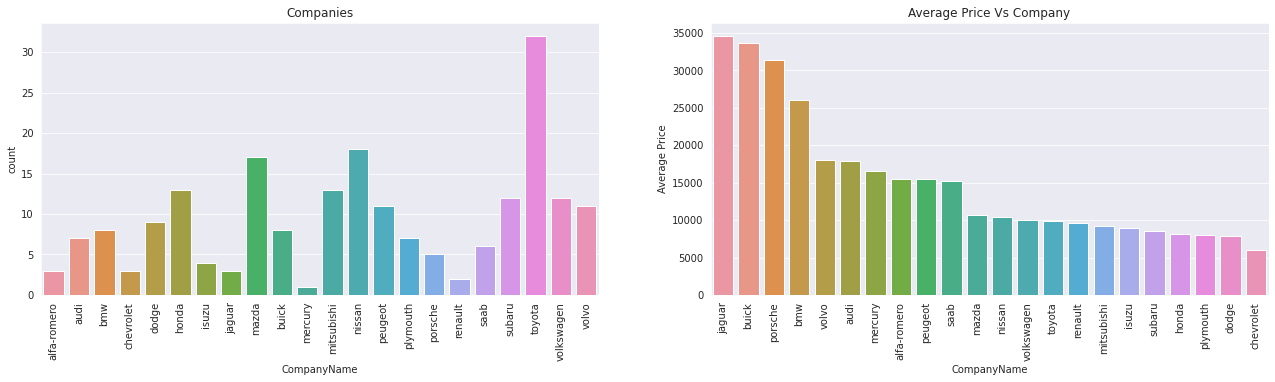

In [43]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)

sns.countplot(cars.CompanyName).set_title('Companies')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
kd = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
kd = kd.reset_index()
sns.barplot(x = kd.CompanyName, y = kd.price).set_title("Average Price Vs Company")
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.show()


 Inference:
 
 1. `Toyota` makes the most buyed cars with `Average Price` around `10000`.
 2. `Jaguar`, `Buick`, and `Porsche` seems to have highest average price.



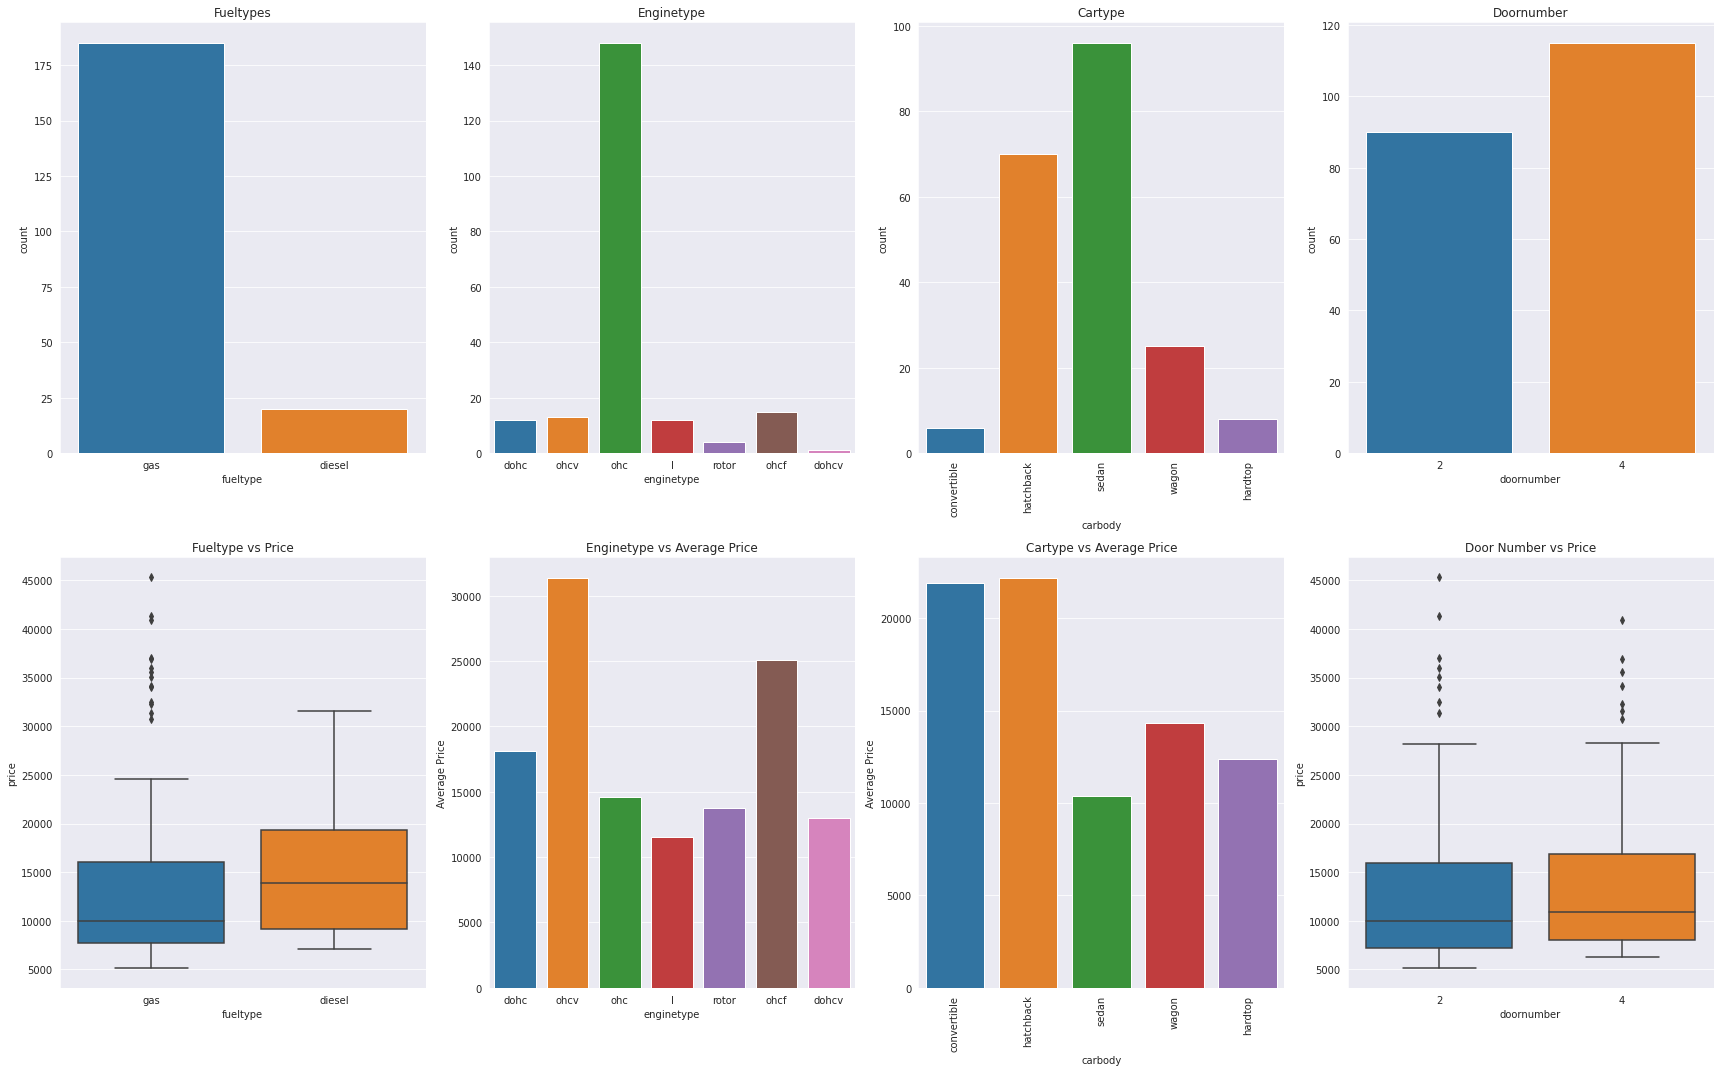

In [44]:
plt.figure(figsize=(24,15))
plt.subplot(2,4,1)
sns.countplot(cars.fueltype).set_title('Fueltypes')

plt.subplot(2,4,2)
sns.countplot(cars.enginetype).set_title('Enginetype')

plt.subplot(2,4,3)
sns.countplot(cars.carbody).set_title('Cartype')
plt.xticks(rotation = 90)

plt.subplot(2,4,4)
sns.countplot(cars.doornumber).set_title('Doornumber')


plt.subplot(2,4,5)
sns.boxplot(x = cars.fueltype, y = cars.price).set_title('Fueltype vs Price')

plt.subplot(2,4,6)
kd = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean())
kd = pd.DataFrame({'x': cars['enginetype'].unique(), 'price': kd['price']})
sns.barplot(x = kd['x'], y = kd['price']).set_title('Enginetype vs Average Price')
plt.xlabel('enginetype')
plt.ylabel('Average Price')

plt.subplot(2,4,7)
kd = pd.DataFrame(cars.groupby(['carbody'])['price'].mean())
kd = pd.DataFrame({'x': cars['carbody'].unique(), 'price': kd['price']})
sns.barplot(x = kd['x'], y = kd['price']).set_title('Cartype vs Average Price')
plt.xlabel('carbody')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)


plt.subplot(2,4,8)
sns.boxplot(x = cars.doornumber, y = cars.price).set_title('Door Number vs Price')
plt.tight_layout()
plt.show()

 Inference:

1. Number of `gas` fueled cars are more than `diesel` fueled.
2. Median price of `gas` fueled cars is lesser than `diesel` cars.
3. `ohc` is the most preferred engine type with average price around 15000.
4. `sedan` is the top car type prefered. `convertible` and `hatchback` cars have higher average price
5. Cars with 4 `doors` were preferred over 2 doors.

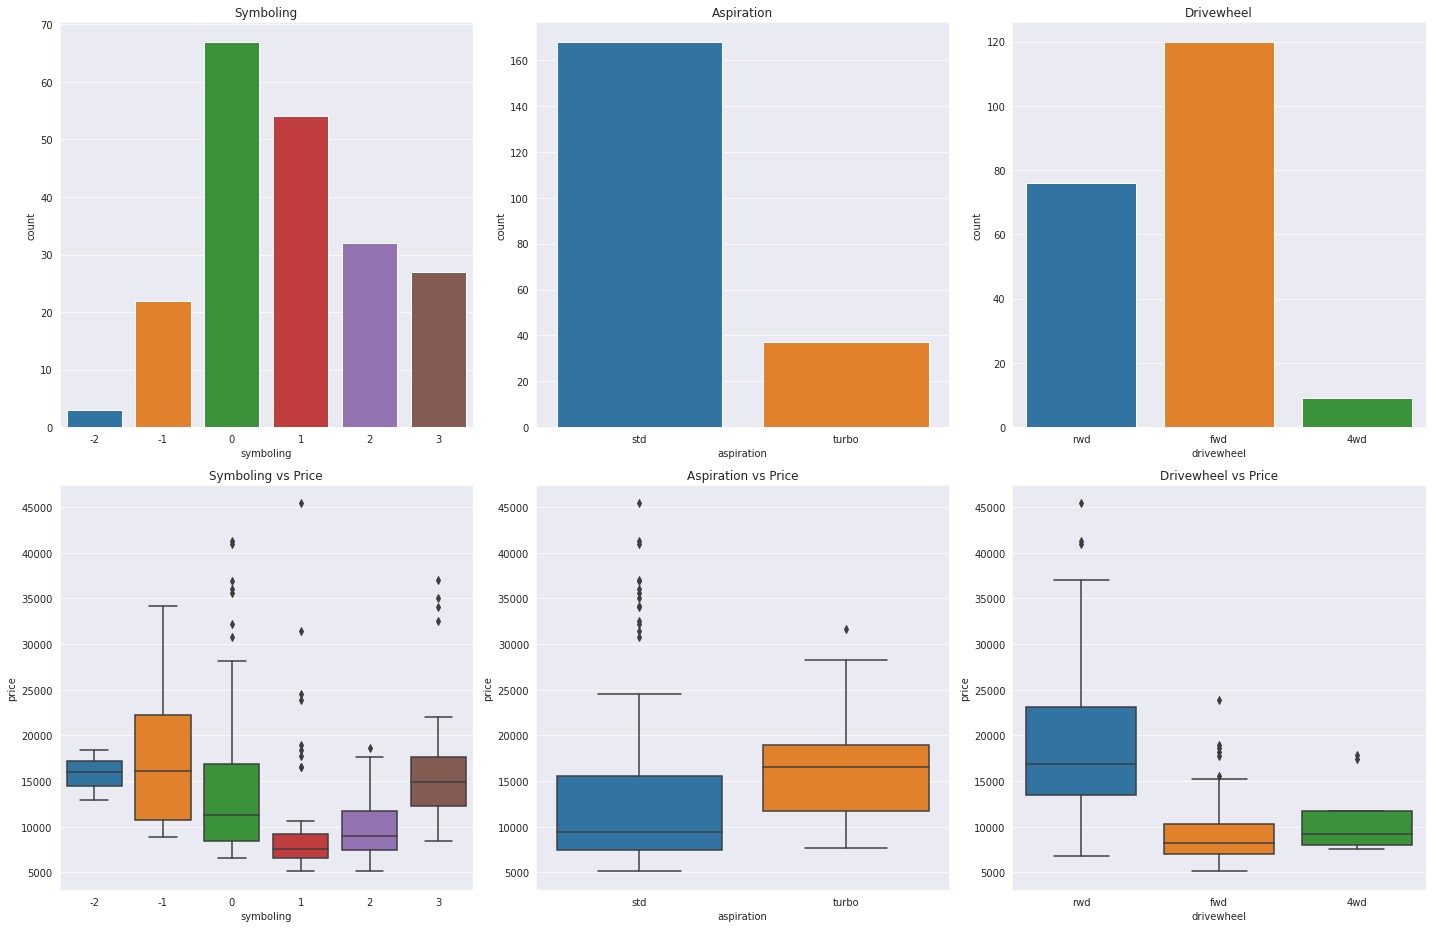

In [45]:
plt.figure(figsize = (20,13))

plt.subplot(2,3,1)
sns.countplot(cars.symboling).set_title('Symboling')

plt.subplot(2,3,2)
sns.countplot(cars.aspiration).set_title('Aspiration')

plt.subplot(2,3,3)
sns.countplot(cars.drivewheel).set_title('Drivewheel')

plt.subplot(2,3,4)
sns.boxplot(x = cars.symboling, y = cars.price).set_title('Symboling vs Price')

plt.subplot(2,3,5)
sns.boxplot(x = cars.aspiration, y = cars.price).set_title('Aspiration vs Price')

plt.subplot(2,3,6)
sns.boxplot(x = cars.drivewheel, y = cars.price).set_title('Drivewheel vs Price')
plt.tight_layout()
plt.show()

Inference:

1. Mostly sold cars have `symboling` values between `0` and `1`.
2. Cars with lower symboling values have higher price.
3. Aspiration with `turbo` have higher interquartile range of price than `std`
4. Most high range cars seems to prefer `rwd`(rear-wheel-drive) drivewheel. 

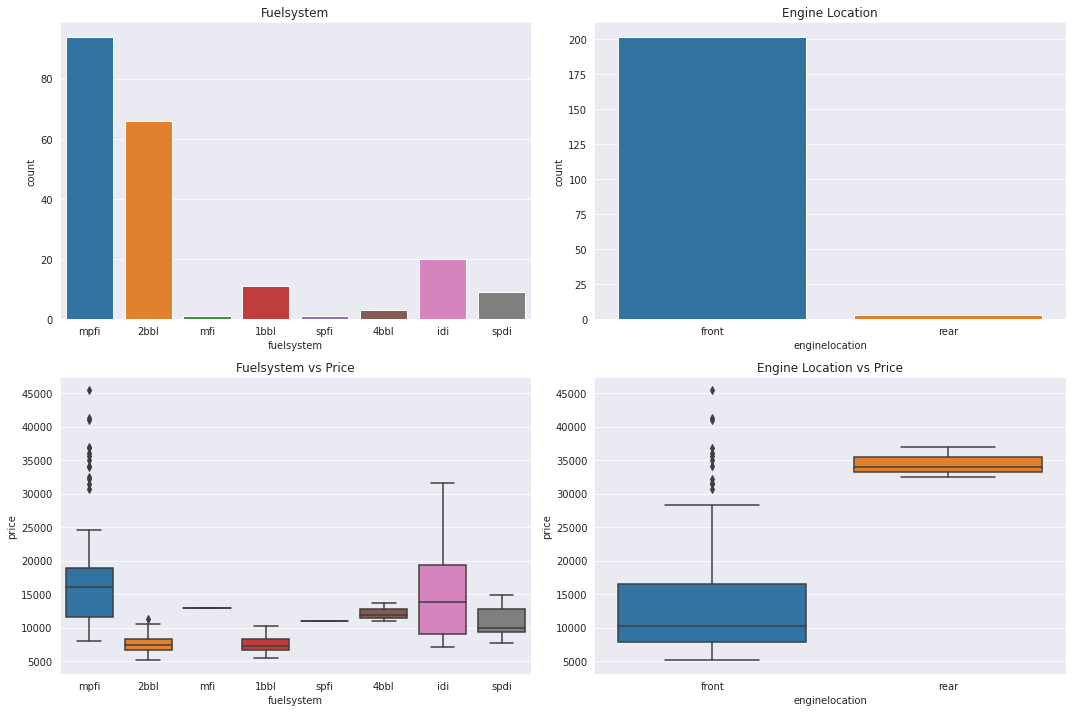

In [46]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(cars.fuelsystem).set_title('Fuelsystem')

plt.subplot(2,2,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars).set_title('Fuelsystem vs Price')

plt.subplot(2,2,2)
sns.countplot(cars.enginelocation).set_title('Engine Location')

plt.subplot(2,2,4)
sns.boxplot(x = cars.enginelocation, y = cars.price).set_title('Engine Location vs Price')
plt.tight_layout()
plt.show()

Inference :

1. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference.
2. Most cars have enginelocation as `front`. Very few datapoints for further infeence to be made.


In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Visualising Numeric Data

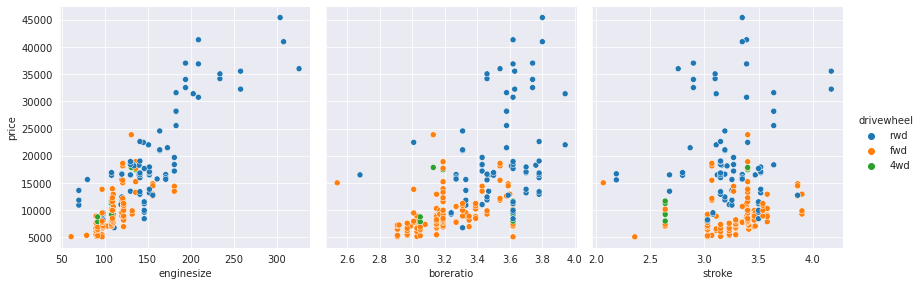

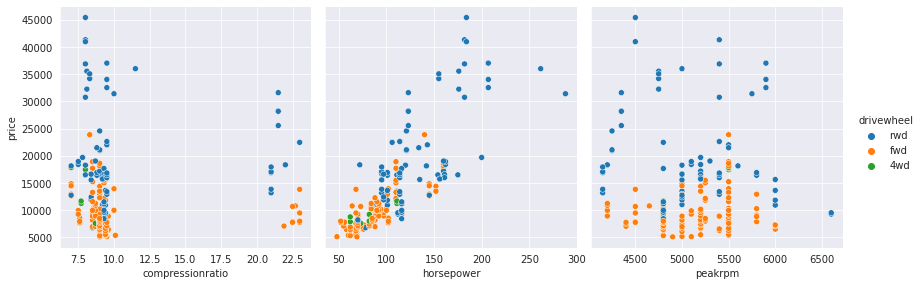

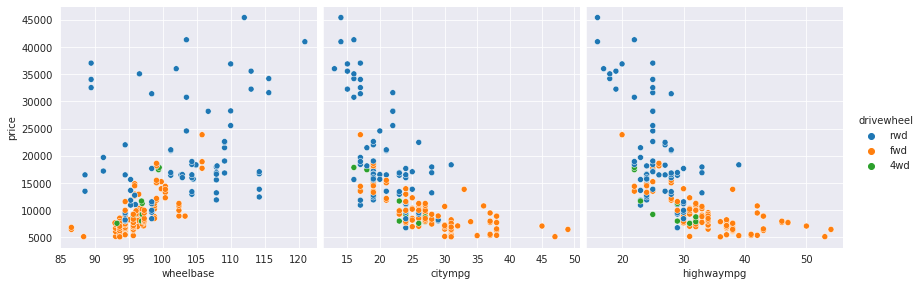

<Figure size 432x288 with 0 Axes>

In [48]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter', hue = 'drivewheel')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')
plt.tight_layout()

Inference:
1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - have a significant positive correlation with price.
2. `citympg`, `highwaympg` - have a significant negative correlation with price.

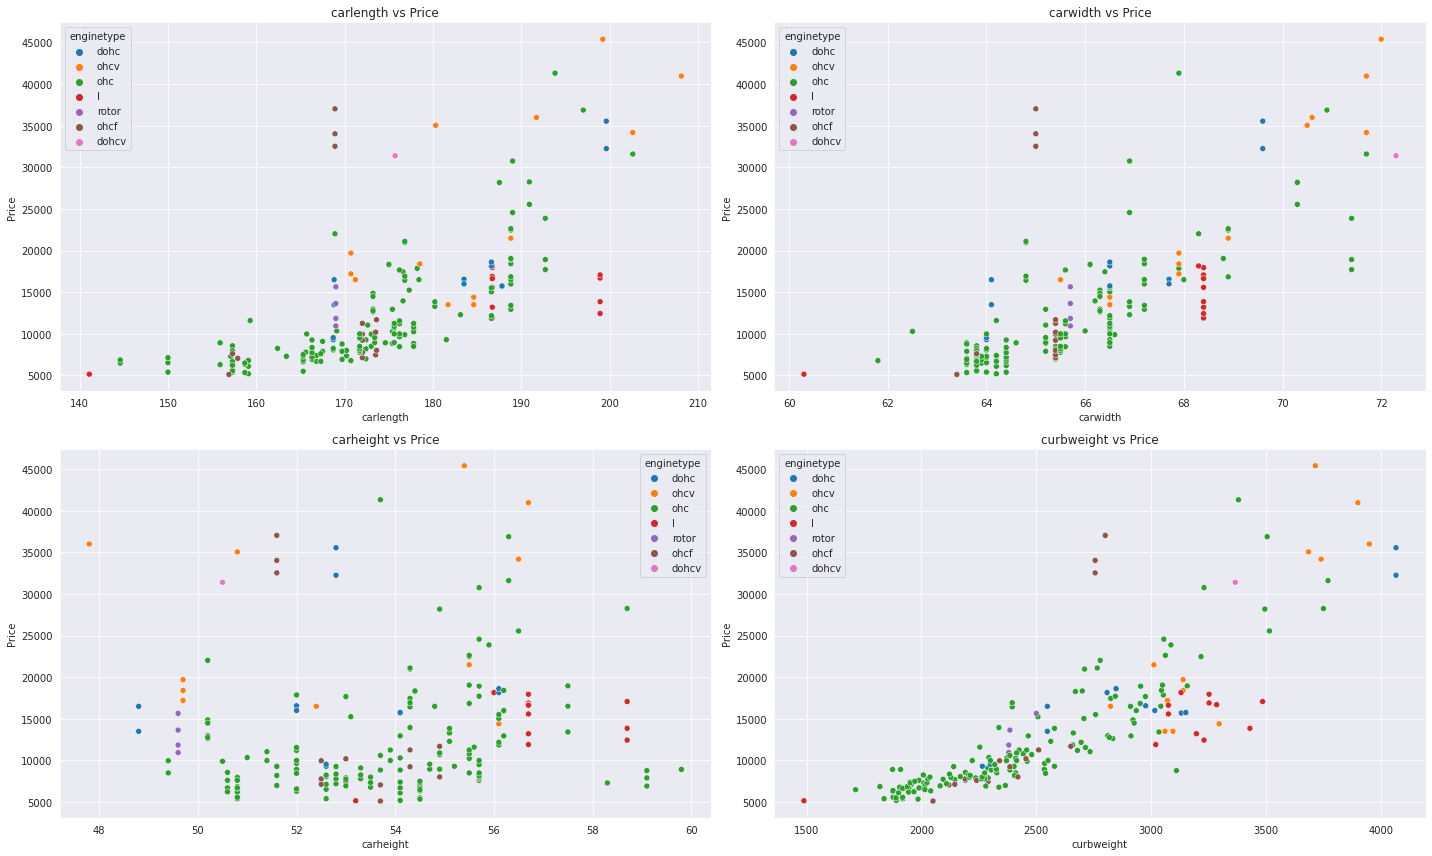

In [49]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    sns.scatterplot(cars[x],cars['price'], hue = cars['enginetype'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,12))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
plt.tight_layout()
plt.show()

 Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

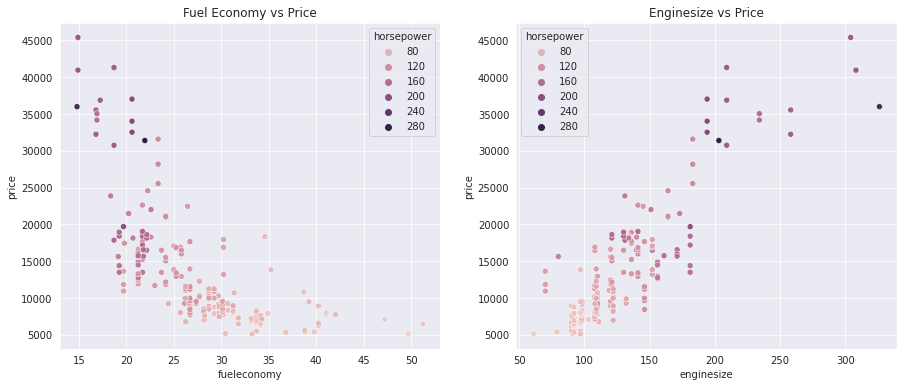

In [50]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.scatterplot(x = cars.fueleconomy, y = cars.price, hue = cars.horsepower).set_title('Fuel Economy vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x = cars.enginesize, y = cars.price, hue = cars.horsepower).set_title('Enginesize vs Price')
plt.show()

 Inference :

1. `fueleconomy` has an obvious `negative correlation` with price and is significant.
2. Cars with more `horsepower` have higher `price` and low `fueleconomy`.
3. `enginesize` is highly correlated with `price`

<Figure size 2520x2520 with 0 Axes>

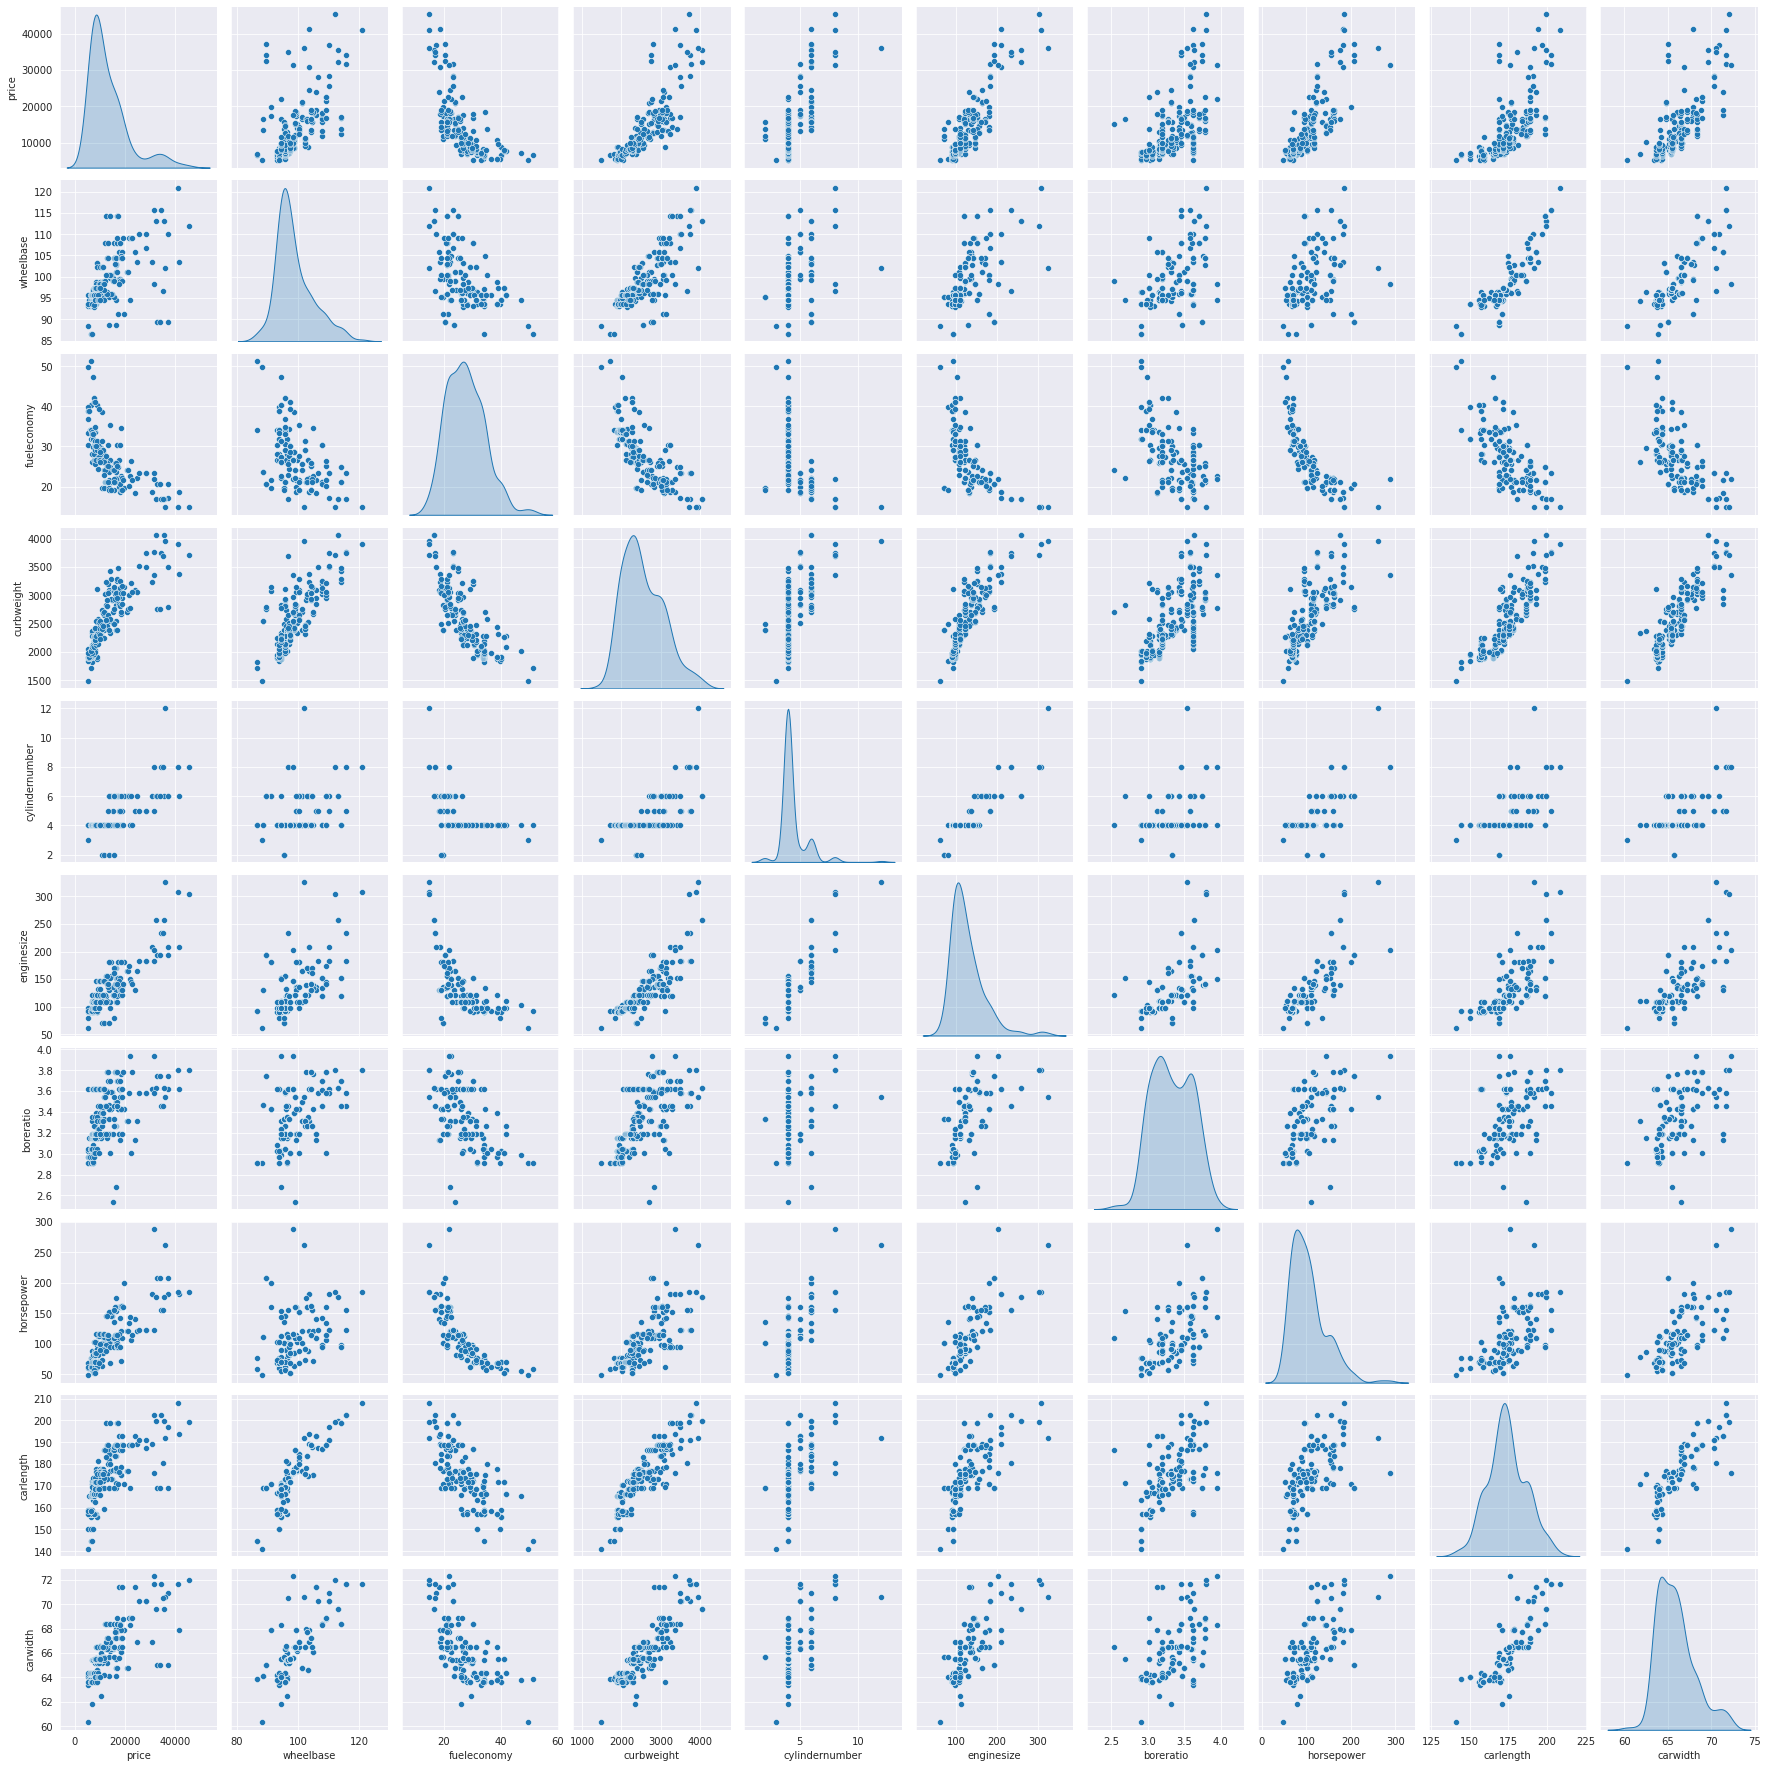

In [51]:
plt.figure(figsize = (35,35))
cars1 = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','fueleconomy',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
sns.pairplot(cars1, diag_kind = 'kde', palette = "Set2")
plt.show()

# Building Machine Learning Models

In [52]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


Convert Categorical Attributes to Numerical features by taking dummy variables

In [53]:
cars2 = cars.copy()
Y = cars.price
#cars2.drop(['car_ID','price'], axis = 'columns', inplace = True)
cars2 = pd.get_dummies(cars2)
cars2.drop(['car_ID','price'], axis = 'columns', inplace = True)
cars2.shape

(205, 75)

Using StandardScaler to remove the mean and scale each feature/variable to unit variance

In [54]:
slr = StandardScaler()
X_scaled = slr.fit_transform(cars2)

In [55]:
X_scaled

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

Dimensionality Reduction using Principal Component Analysis(PCA)

In [56]:
pca = PCA(0.95) #retaining 95% of information
cars_pca = pca.fit_transform(X_scaled)
cars_pca.shape

(205, 35)

Splitting dataset into training and test sets

In [57]:
np.random.seed(9)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.3)
#X_train, X_test, Y_train, Y_test = train_test_split(cars_pca,Y,test_size = 0.3, random_state= 9)

In [58]:
def print_metrics(y_test,y_pred):
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
  print('Mean Absolute Percentage Error:', round(metrics.mean_absolute_percentage_error(y_test, y_pred),2))
  print('R2 score:', round(metrics.r2_score(y_pred,y_test),2))

### Since the target variable(`price`) is continuos which implies that regression will be the best suited technique for making prediction.
We built 5 different regression models to compare the accuracies and chose one with best performance. These models include sklearn's, `LinearRegression()`, `DecisionTreeRegressor()`,`RandomForestRegressor()`, and XGBoost's(Extreme Gradient Boost) `XGBRegressor`. We also built a `Deep Neural Network` with 2 hidden layers and linear activation function.

### Model 1: Multiple Linear Regression
  - It is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.
  - In this section we use sklearn's `LinearRegression()` method to build model and predict the target variable.

In [59]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [60]:
print("Goodness of fit: " + str(round((lr.score(X_train,Y_train)*100),2)) + "%")
y_pred1 = lr.predict(X_test)
print("Model Score: "+ str(round(lr.score(X_test,Y_test)*100,2)) + "%")

Goodness of fit: 96.78%
Model Score: 92.47%


In [61]:
print_metrics(Y_test,y_pred1)

Mean Absolute Error: 1645.5
Mean Squared Error: 4617851.71
Root Mean Squared Error: 2148.92
Mean Absolute Percentage Error: 0.14
R2 score: 0.94


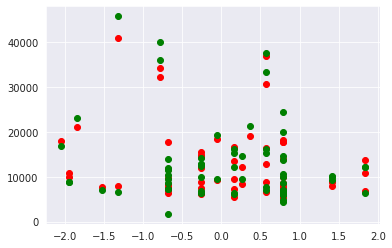

In [62]:
plt.scatter(X_test[:,11], Y_test, color = 'red')
plt.scatter(X_test[:,11], y_pred1, color = 'green')
plt.show()

### Model 2: Decision Tree Regression

In [63]:
#regressor = DecisionTreeRegressor(random_state=10, max_depth=4)
regressor = DecisionTreeRegressor( max_depth=4)

regressor.fit(X_train, Y_train)
y_pred2 = regressor.predict(X_test)
print("Goodness of fit: " + str(round((regressor.score(X_train,Y_train)*100),2)) + "%")
print("Model Score: "+ str(round(regressor.score(X_test,Y_test)*100,2)) + "%")

Goodness of fit: 95.24%
Model Score: 87.99%


In [64]:
print_metrics(Y_test,y_pred2)

Mean Absolute Error: 1841.53
Mean Squared Error: 7362708.29
Root Mean Squared Error: 2713.43
Mean Absolute Percentage Error: 0.14
R2 score: 0.91


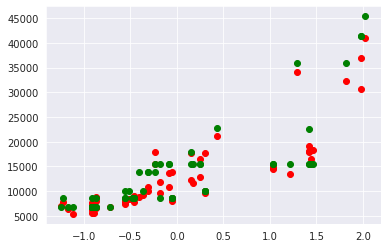

In [65]:
plt.scatter(X_test[:,10], Y_test, color = 'red')
plt.scatter(X_test[:,10], y_pred2, color = 'green')
plt.show()

### Model 3. Random Forest Regression

In [66]:
#regressor = RandomForestRegressor(random_state=9)
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
y_pred3 = regressor.predict(X_test)

print("Goodness of fit: " + str(round((regressor.score(X_train,Y_train)*100),2)) + "%")
print("Model Score: "+ str(round(regressor.score(X_test,Y_test)*100,2)) + "%")

Goodness of fit: 98.71%
Model Score: 92.86%


In [67]:
print_metrics(Y_test,y_pred3)

Mean Absolute Error: 1356.2
Mean Squared Error: 4374366.01
Root Mean Squared Error: 2091.5
Mean Absolute Percentage Error: 0.11
R2 score: 0.94


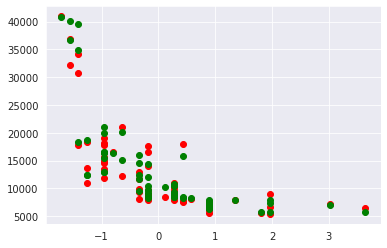

In [68]:
plt.scatter(X_test[:,12], Y_test, color = 'red')
plt.scatter(X_test[:,12], y_pred3, color = 'green')
plt.show()

### Model 4. XGBRegressor

In [69]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
y_pred4 = regressor.predict(X_test)

print("Goodness of fit: " + str(round((regressor.score(X_train,Y_train)*100),2)) + "%")
print("Model Score: "+ str(round(regressor.score(X_test,Y_test)*100,2)) + "%")

[09:11:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Goodness of fit: 99.24%
Model Score: 92.37%


In [70]:
print_metrics(Y_test,y_pred4)

Mean Absolute Error: 1346.64
Mean Squared Error: 4680061.94
Root Mean Squared Error: 2163.35
Mean Absolute Percentage Error: 0.1
R2 score: 0.94


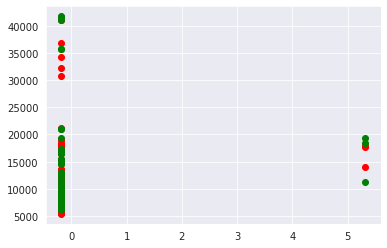

In [71]:
plt.scatter(X_test[:,16], Y_test, color = 'red')
plt.scatter(X_test[:,16], y_pred4, color = 'green')
plt.show()

### Model 5: Neural Network Based Regression

In [72]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [73]:
NNmodel = Sequential()

# The Input Layer :
NNmodel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NNmodel.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNmodel.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NNmodel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NNmodel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


In [74]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [75]:
NNmodel.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
1/4 [======>.......................] - ETA: 2s - loss: 15714.0771 - mean_absolute_error: 15714.0771
Epoch 1: val_loss improved from inf to 13223.75000, saving model to Weights-001--13223.75000.hdf5
4/4 [==============================] - 1s 79ms/step - loss: 13636.0156 - mean_absolute_error: 13636.0156 - val_loss: 13223.7500 - val_mean_absolute_error: 13223.7500
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 15346.4170 - mean_absolute_error: 15346.4170
Epoch 2: val_loss improved from 13223.75000 to 13222.65918, saving model to Weights-002--13222.65918.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 13635.2471 - mean_absolute_error: 13635.2471 - val_loss: 13222.6592 - val_mean_absolute_error: 13222.6592
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 12839.4805 - mean_absolute_error: 12839.4805
Epoch 3: val_loss improved from 13222.65918 to 13220.56641, saving model to Weights-003--13220.56641.hdf5
4/4 [=================

In [76]:
y_pred5 = NNmodel.predict(X_test)
print_metrics(Y_test,y_pred5)

2/2 [==============================] - 0s 6ms/step
Mean Absolute Error: 1919.13
Mean Squared Error: 6218936.12
Root Mean Squared Error: 2493.78
Mean Absolute Percentage Error: 0.15
R2 score: 0.93


### Conclusions
1. This problem statement was identified as Regression problem.
2. Used several regression models to predict the price of the cars with least error.
3. The Multiple Linear Regression, Decision Tree Regression, Random Forest Regression and XGBRegression performs very well on the training as well as test sets with Model scores of `92.75%`, `88.2%`, `93.78%` and `92.45%` respectively.
4. Among all models the Random Forest Regression technique performs best, but the difference is not much. Any of the three models can be used by the company.
5. We also tried regression using Sequential Neural Networks, produced output has a `Root mean square error` value of `2391.99` and `R2 score` of `0.93` which is also a good score.

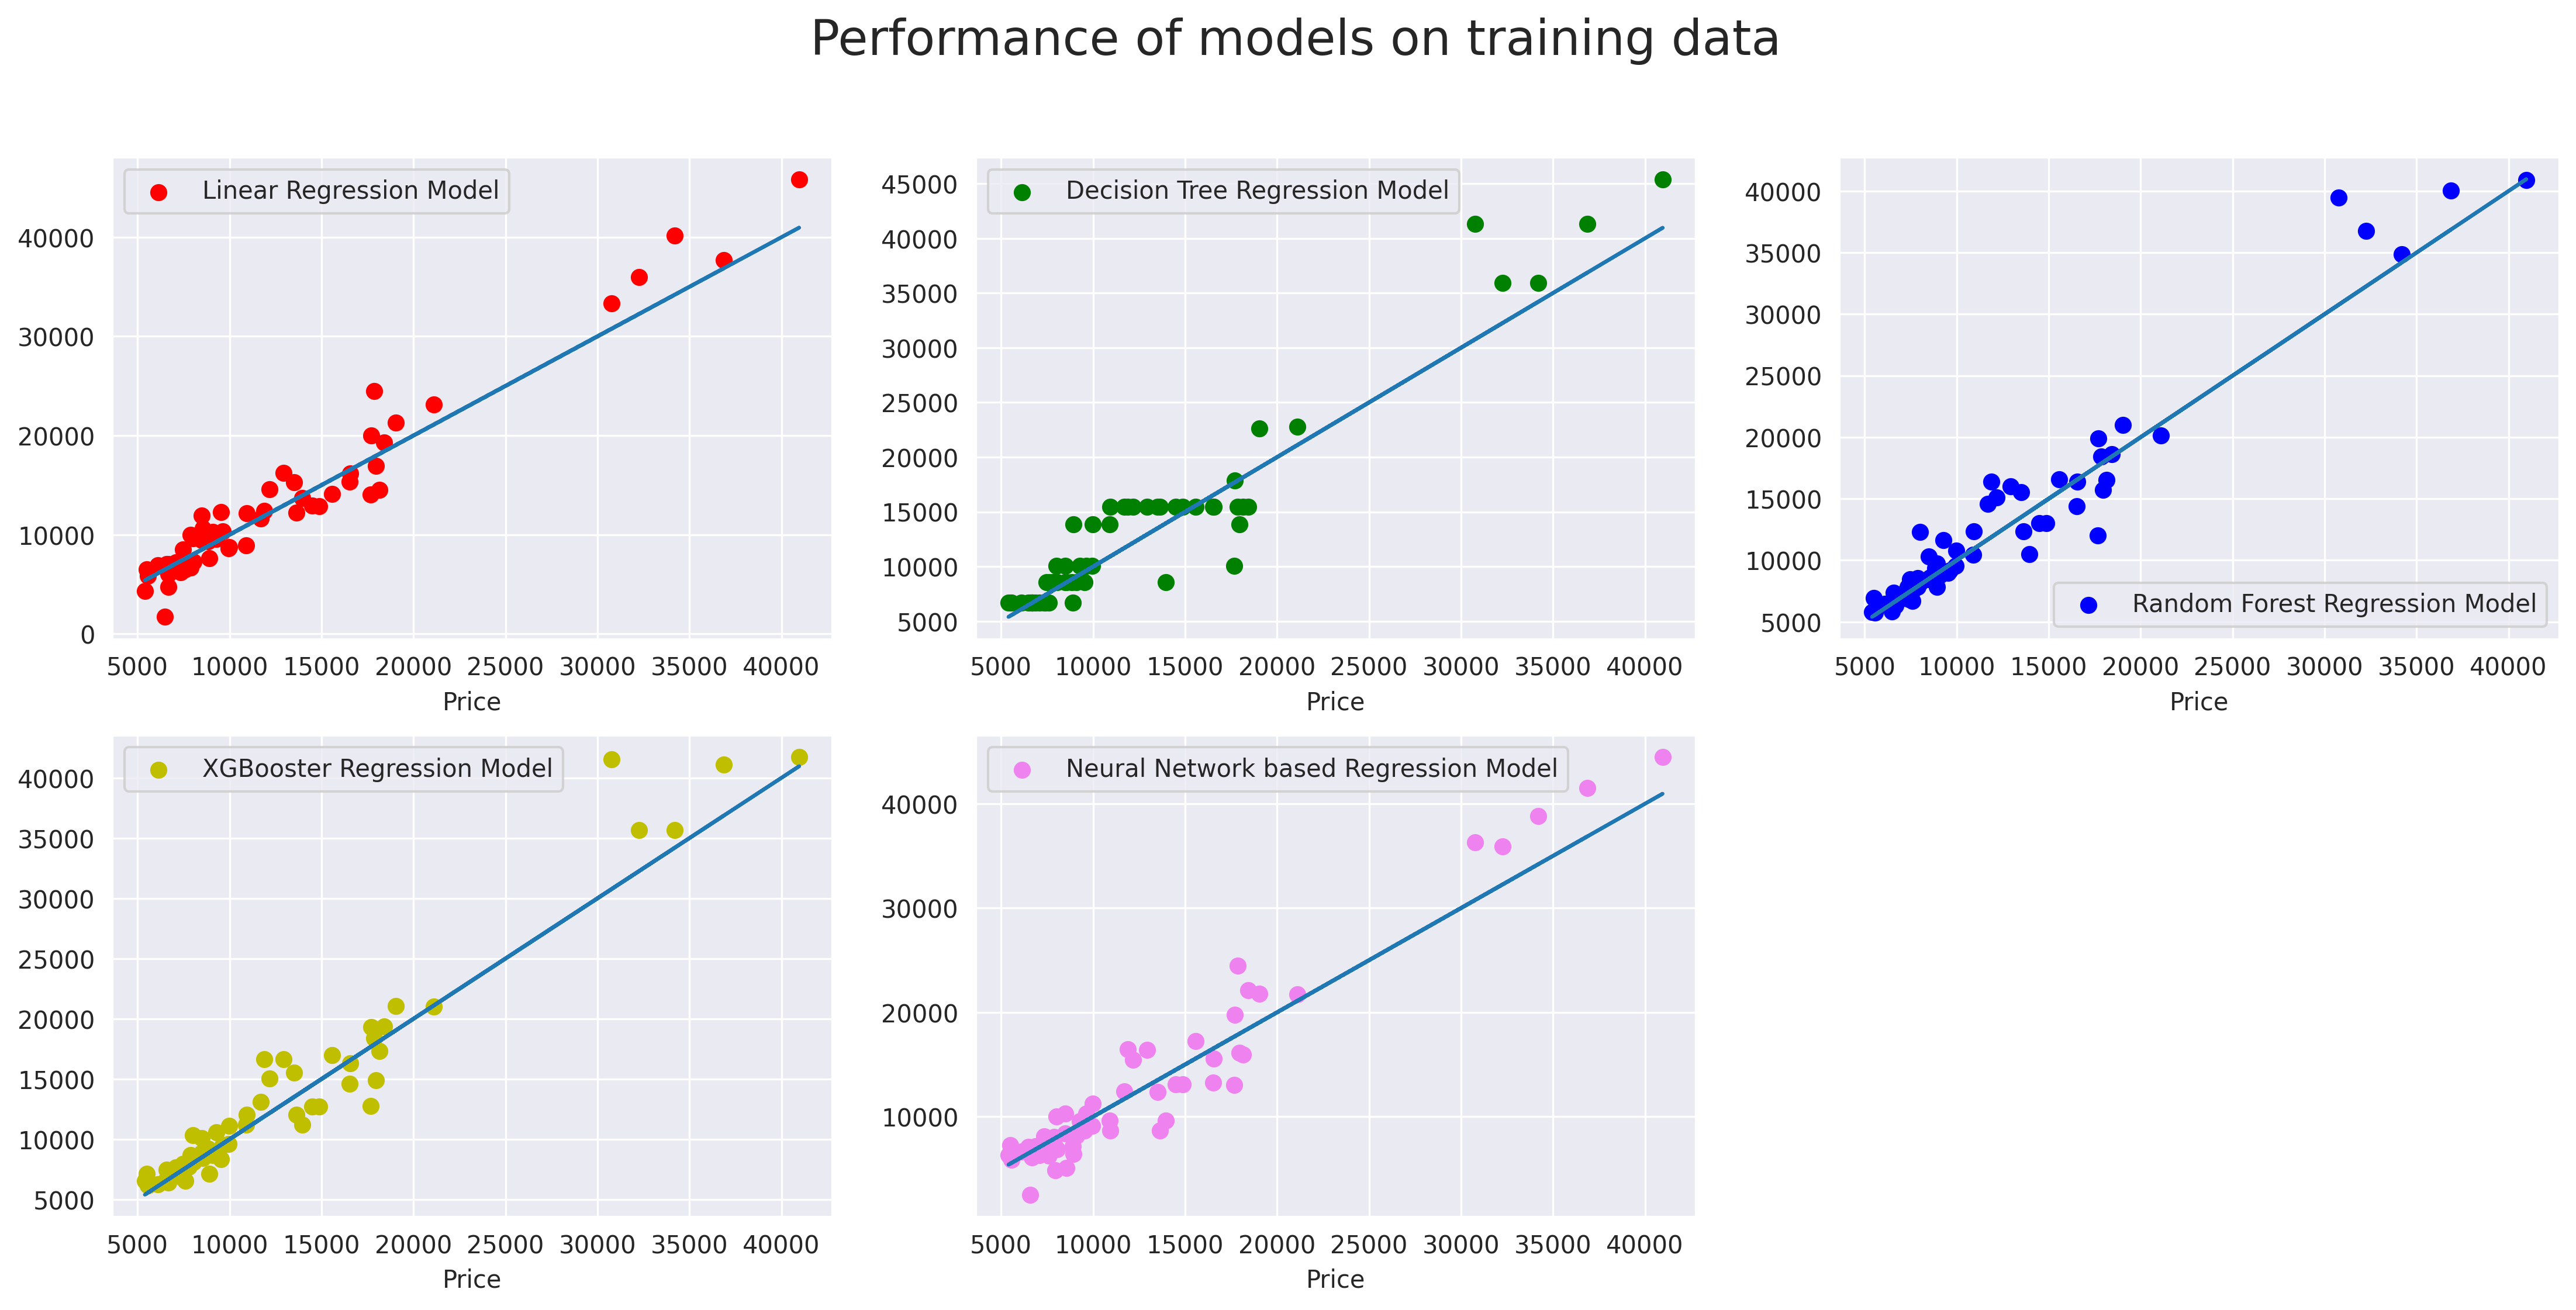

In [77]:
plt.figure(figsize=(18,8), dpi = 300)
plt.suptitle("Performance of models on training data", fontsize = 20)
plt.subplot(2,3,1)
plt.plot(Y_test,Y_test)
plt.scatter(Y_test,y_pred1, color = 'r', label = 'Linear Regression Model')
plt.xlabel('Price')
plt.legend()

plt.subplot(2,3,2)
plt.plot(Y_test,Y_test)
plt.scatter(Y_test,y_pred2, color = 'g', label = 'Decision Tree Regression Model')
plt.xlabel('Price')
plt.legend()

plt.subplot(2,3,3)
plt.plot(Y_test,Y_test)
plt.scatter(Y_test,y_pred3, color = 'b', label = 'Random Forest Regression Model')
plt.xlabel('Price')
plt.legend()

plt.subplot(2,3,4)
plt.plot(Y_test,Y_test)
plt.scatter(Y_test,y_pred4, color = 'y', label = 'XGBooster Regression Model')
plt.xlabel('Price')
plt.legend()

plt.subplot(2,3,5)
plt.plot(Y_test,Y_test)
plt.scatter(Y_test,y_pred5, color = 'violet', label = 'Neural Network based Regression Model')
plt.xlabel('Price')
plt.legend()

plt.show()